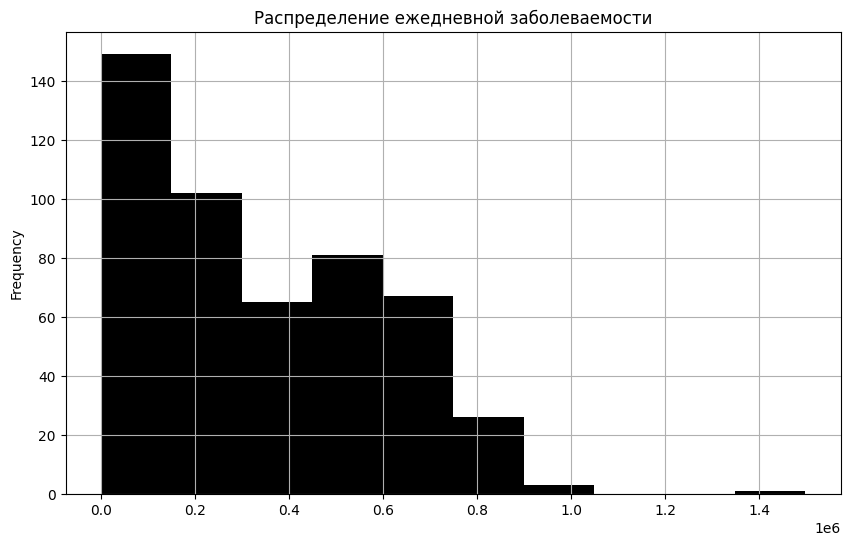

In [17]:
import pandas as pd
covid_data = pd.read_csv('C:\IDA\DataCleaningProject\data/covid_data.csv', sep = ',')
vaccinations_data  = pd.read_csv('C:\IDA\DataCleaningProject\data/country_vaccinations.csv', sep = ',')
covid_data = covid_data.groupby(['date', 'country'],as_index=False)[['confirmed', 'deaths', 'recovered']].sum()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['active'] = covid_data['confirmed'] - covid_data['deaths'] - covid_data['recovered']
covid_data = covid_data.sort_values(by=['country', 'date'])
covid_data['daily_confirmed'] = covid_data.groupby('country')['confirmed'].diff()
covid_data['daily_deaths'] = covid_data.groupby('country')['deaths'].diff()
covid_data['daily_recovered'] = covid_data.groupby('country')['recovered'].diff()
vaccinations_data['date'] = pd.to_datetime(vaccinations_data['date'])
covid_df = covid_data.merge(vaccinations_data, on=['date', 'country'], how='left')
covid_df['death_rate'] = covid_df['deaths']/covid_df['confirmed']*100
covid_df['recover_rate'] = covid_df['recovered']/covid_df['confirmed']*100
grouped_cases = covid_df.groupby('date')['daily_confirmed'].sum()
grouped_cases.plot(
        kind='hist',
        figsize=(10, 6),
        title='Распределение ежедневной заболеваемости',
        grid = True,
        color = 'black',
        bins=10
    );